# CAT submission
## - Mwangi Brian Kinyua
## - SCT211-0005/2023


# Question 1

## You are provided with the function f(x) = x^2 - 6x + 9.

### a) Implement a Python function that performs gradient descent to minimize this function.
The function should take as parameters:
- the initial guess x0,
- learning rate alpha,
- and number of iterations n.
The function should return the list of x-values and f(x)-values for each iteration. [10
Marks]

In [9]:
def gradient_descent(x0, alpha, n):
    # Define the function f(x) = x^2 - 6x + 9
    def f(x):
        return x**2 - 6*x + 9

    # Define the derivative of f(x), f'(x) = 2x - 6
    def f_prime(x):
        return 2*x - 6

    x_values = [x0]
    f_values = [f(x0)]

    x = x0
    for _ in range(n):
        # Update x using the gradient descent formula
        x = x - alpha * f_prime(x)
        x_values.append(x)
        f_values.append(f(x))

    return x_values, f_values

### b) Run your function with x0 = 2, alpha = 0.1, and n = 10. Present the output as a table with columns: iteration, x-value, f(x)-value. 

In [10]:
x_values, f_values = gradient_descent(2, 0.1, 10)

print(f"{'Iteration':<10}{'x-value':<15}{'f(x)-value':<15}")
for i, (x, fx) in enumerate(zip(x_values, f_values)):
    print(f"{i:<10}{x:<15.6f}{fx:<15.6f}")

Iteration x-value        f(x)-value     
0         2.000000       1.000000       
1         2.200000       0.640000       
2         2.360000       0.409600       
3         2.488000       0.262144       
4         2.590400       0.167772       
5         2.672320       0.107374       
6         2.737856       0.068719       
7         2.790285       0.043980       
8         2.832228       0.028147       
9         2.865782       0.018014       
10        2.892626       0.011529       


### c) Explain what would happen if the learning rate were set to 1 instead of 0.1, using insights from your code and outputs. 

If the learning rate (( \alpha )) were set to 1 instead of 0.1, the gradient descent algorithm would likely fail to converge to the minimum of the function. Here's why:

Insights from the Code and Outputs:
Gradient Descent Update Rule: The update rule for gradient descent is: [ x_{\text{new}} = x_{\text{old}} - \alpha \cdot f'(x_{\text{old}}) ] A larger learning rate (( \alpha = 1 )) means that the step size in the direction of the gradient is much larger compared to ( \alpha = 0.1 ).

Overshooting the Minimum:

With ( \alpha = 1 ), the algorithm may take steps that are too large, causing it to overshoot the minimum of the function.
Instead of converging, the x values may oscillate or even diverge, depending on the shape of the function and the gradient.
Behavior of the Function ( f(x) = x^2 - 6x + 9 ):

The derivative ( f'(x) = 2x - 6 ) determines the step size.
For larger values of ( x ), the gradient is larger, and with ( \alpha = 1 ), the updates become excessively large, leading to instability.
Expected Output:

Instead of gradually approaching the minimum, the x values would oscillate around the minimum or diverge entirely.
The function values ( f(x) ) would not decrease consistently and might increase instead.
Example:
If you run the gradient descent function with ( \alpha = 1 ), you might observe something like this:

In [11]:
x_values, f_values = gradient_descent(2, 1, 10)

print(f"{'Iteration':<10}{'x-value':<15}{'f(x)-value':<15}")
for i, (x, fx) in enumerate(zip(x_values, f_values)):
    print(f"{i:<10}{x:<15.6f}{fx:<15.6f}")

Iteration x-value        f(x)-value     
0         2.000000       1.000000       
1         4.000000       1.000000       
2         2.000000       1.000000       
3         4.000000       1.000000       
4         2.000000       1.000000       
5         4.000000       1.000000       
6         2.000000       1.000000       
7         4.000000       1.000000       
8         2.000000       1.000000       
9         4.000000       1.000000       
10        2.000000       1.000000       


This oscillation occurs because the step size is too large, causing the algorithm to jump back and forth across the minimum.

Conclusion:
A learning rate that is too large (e.g., ( \alpha = 1 )) can prevent convergence by causing overshooting or divergence. To ensure stable and consistent convergence, the learning rate should be chosen carefully, often through experimentation or tuning.

# Question 2

## A researcher is modeling a simple electrical circuit where:
- 2I1 + 3I2 = 8 (KVL Equation 1)
- 5I1 + 7I2 = 19 (KVL Equation 2)

#### a) Formulate this system of equations as a matrix problem and solve it using NumPy in Python. 

In [1]:
import numpy as np

# Coefficient matrix A
A = np.array([[2, 3],
              [5, 7]])

# Result vector B
B = np.array([8, 19])

# Solve for X (I1, I2)
X = np.linalg.solve(A, B)

# Display the results
print(f"I1 = {X[0]:.2f}, I2 = {X[1]:.2f}")

I1 = 1.00, I2 = 2.00


 #### b) Modify your code to read the coefficients and constants from a `.txt` file that has the system in this format:
 #### 2 3 8
 #### 5 7 19
#### Write code to parse the file and solve the system. 

In [12]:
import numpy as np

# Function to read the coefficients and constants from a file
def read_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Parse the lines into a matrix
        matrix = [list(map(float, line.split())) for line in lines]
    return np.array(matrix)

# Read the matrix from the sample file
matrix = read_matrix_from_file('text.txt')

# Split the matrix into coefficients (A) and constants (B)
A = matrix[:, :-1] 
B = matrix[:, -1]   

# Solve the system of equations
X = np.linalg.solve(A, B)

# Display the results
print(f"I1 = {X[0]:.2f}, I2 = {X[1]:.2f}")

I1 = 1.00, I2 = 2.00


#### c) Explain one real-world implication if the matrix of coefficients were nearly singular.
#### How would that affect the solution, and what could you do about it computationally?

If the matrix coefficienrts were nearly singular meaning the the determinant is close to zero implies that the system of equations is ill-conditioned.
##### real world implication.
In control systems, a nearly singular matrix can have significant implications for the controllability and observability of the system. This implies that:
- Certain states of the system are difficult or impossible to control.
- The system may not respond effectively to control inputs, leading to poor performance or instability.
##### Computational Impact
- A nearly singular matrix in the controllability or observability matrix can lead to numerical instability when solving for control inputs or state estimations.
This can result in inaccurate or unreliable control actions.
##### Mitigation
- Redesign the System:
Modify the system's configuration to avoid near-singular conditions. For example, in robotics, avoid joint configurations that lead to singularities.
- Regularization:
Add small perturbations to the matrix to improve its condition number, ensuring numerical stability.


# Question 3

## Given a file data.csv with two columns: Time (s) and Temperature (°C), your task is to analyze a heat transfer process

#### a) Write a Python script that:
- reads the data using pandas,
- plots a line graph of temperature vs time,
- and adds labels, title, and grid.

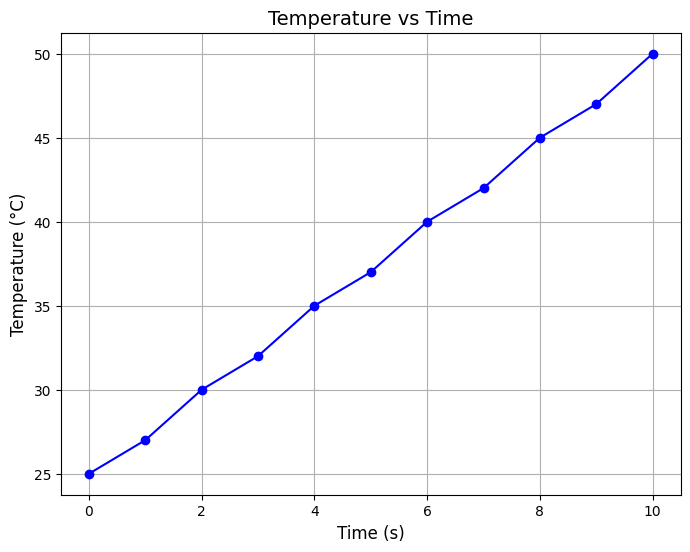

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('data.csv') 

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(data['Time (s)'], data['Temperature (°C)'], marker='o', linestyle='-', color='b')

# Add labels, title, and grid
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Temperature vs Time', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

#### b) Based on your graph, explain any two observations you can make about the heating process (e.g., steady state, rate of change). 

##### Steady Increase in temperature
The graph shows a consitent upward trend. This indicates trhat the temperature is steadily increasing over time. The heating is uniform.
##### Rate of Change
The slope of the graph is almost constant. indicating a linear relationship between time and temperature. This is also an implication of a constant rate heating process.


#### c) Describe a situation in engineering where such visualization can be used to influence decision-making.

##### Battery Performance Analysis
In this context a graph of Voltage vs. Time can be used to moniter and evaluate the behaviour of a battery under different load condtions. 
A graph can show how the battery voltage decreases with time under a specific load. a steady decline will indicate normal behaviour while sudden drops will indicate issues such as internal reistance build up or cell imbalance.
The graph may also help identify the end-of life conditions os a battery. If the battery voltage drops below critical threshold this signals the end of its usable charge.

# Question 4.

## You are simulating population growth using the differential equation dy/dt = 0.5y, where y(0) = 100.

#### a) Use Euler’s Method to approximate the population size after 4 time steps with step size h = 0.5. Show all computations. 

In [6]:
# Euler's Method for population growth
def euler_method(h, steps, y0):
    results = []
    t = 0
    y = y0
    results.append((t, y))  # Initial condition
    for _ in range(steps):
        y = y + h * (0.5 * y)  # Euler's formula
        t = t + h
        results.append((t, y))
    return results

# Parameters
h = 0.5  # Step size
steps = 4  # Number of steps
y0 = 100  # Initial population

# Compute results
results = euler_method(h, steps, y0)

# Display results
print(f"{'Step':<10}{'Time':<10}{'Population':<15}")
for i, (t, y) in enumerate(results):
    print(f"{i:<10}{t:<10.2f}{y:<15.6f}")

Step      Time      Population     
0         0.00      100.000000     
1         0.50      125.000000     
2         1.00      156.250000     
3         1.50      195.312500     
4         2.00      244.140625     


#### b) Write a Python function that generalizes the Euler’s method to solve any first-order ODE given f(t, y), initial condition, step size, and number of steps.

In [8]:
# Generalized Euler's Method for solving first-order ODEs
def generalized_euler(f, t0, y0, h, steps):
    """
    Solves a first-order ODE using Euler's method.

    Parameters:
        f (function): The function f(t, y) representing dy/dt.
        t0 (float): The initial time.
        y0 (float): The initial value of y at t0.
        h (float): The step size.
        steps (int): The number of steps to compute.

    Returns:
        list: A list of tuples (t, y) representing the time and corresponding y values.
    """
    results = [(t0, y0)]  # Initialize with the initial condition
    t, y = t0, y0

    for _ in range(steps):
        y = y + h * f(t, y)  # Euler's formula
        t = t + h
        results.append((t, y))

    return results


# Define the ODE dy/dt = 0.5y
def f(t, y):
    return 0.5 * y

    # Initial conditions
t0 = 0      # Initial time
y0 = 100    # Initial population
h = 0.5     # Step size
steps = 4   # Number of steps

    # Solve the ODE
results = generalized_euler(f, t0, y0, h, steps)

    # Display the results
print(f"{'Step':<10}{'Time':<10}{'Population':<15}")
for i, (t, y) in enumerate(results):
    print(f"{i:<10}{t:<10.2f}{y:<15.6f}")

Step      Time      Population     
0         0.00      100.000000     
1         0.50      125.000000     
2         1.00      156.250000     
3         1.50      195.312500     
4         2.00      244.140625     


#### c) Briefly explain two limitations of using Euler’s Method for real-world systems, and suggest one alternative method.

Limitations of Euler's Method:
- Low Accuracy: 
Euler's method is a first-order numerical method, meaning it has a local truncation error proportional to the square of the step size ((O(h^2))).
For real-world systems with rapidly changing dynamics, this low accuracy can lead to significant errors unless very small step sizes are used, which increases computational cost.
- Instability: Euler's method can become unstable for stiff differential equations, where the solution changes rapidly over a short interval.
In such cases, the method may produce oscillations or diverge entirely, making it unsuitable for stiff systems.
##### Alternative Method: Runge-Kutta Methods

Runge-Kutta methods, such as the 4th-order Runge-Kutta method (RK4), provide higher accuracy and better stability compared to Euler's method.
RK4 has a local truncation error of (O(h^5)), making it much more accurate for the same step size.
Advantages:

Higher accuracy with fewer steps.
Better stability for stiff or rapidly changing systems.